# Solution Approach

## Problem

1. Identification of Awareness among people and Technology improvement
2. Identification of highest Survival Chance among all the cancers
3. Identification of Cancer with high concern

## Metric

1. Trend of New Cases
2. Death rate among cancer types
3. High chance of survival among cancer
4. Top cancer types
5. Comparsion of cases (9 & 13) vs death rate
6. Deadly Cancers

# Code & Analysis

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


base_url="https://seer.cancer.gov"
req = requests.get(base_url+"/statfacts")
soup = BeautifulSoup(req.text, "html.parser")
print(soup.title.text)

def get_data(soup,typ):
    data_table=soup.select("div.defaultData.showData-table-1")#soup.findAll('div', {"class": "scrapeTable"})[2].findAll('table')
    data=[]
    #headers=[header.text for header in data_table[0].findAll('th')][:9]  #['Year', 'Rate of New Cases — SEER 9 ', 'Rate of New Cases — SEER 13', 'Death Rate — U.S.', '5-Year Relative Survival — SEER 9', 'Observed', 'Modeled Trend', 'Observed', 'Modeled Trend']
    for table in data_table:
        for row in table.findAll("tr"):
            data.append([ele.text.strip() for ele in row.findAll("td")])
    df=pd.DataFrame(data)
    df['Cancer Type']=typ
    df.drop(index=[0,1],  axis=0, inplace=True)
    return df


headers=['Year', 'New SEER 9(Obs)','New SEER 9(Modeled)', 'New SEER 13(Obs)', 'New SEER 13(Modeled)', 'Death U.S.(Obs)', 'Death U.S.(Modeled)', 'Survival SEER9(Obs)','Survival SEER 9(Modeled)','Cancer Type']
#['Year', 'Rate of New Cases — SEER 9(Observed) ','Rate of New Cases — SEER 9(Modeled Trend) ', 'Rate of New Cases — SEER 13(Observed)', 'Rate of New Cases — SEER 13(Modeled Trend)', 'Death Rate — U.S.(Observed)', 'Death Rate — U.S.(Modeled Trend)', '5-Year Relative Survival — SEER 9(Observed)','5-Year Relative Survival — SEER 9(Modeled Trend)','Cancer Type']
df_final=pd.DataFrame()
for link in soup.find('div', {"class": "alphaList"}).findAll('a', href=True):
    try:  
        scrap_url=base_url+link['href']
        soup = BeautifulSoup(requests.get(scrap_url).text, "html.parser") 
        cancer_typ=soup.title.text.split(' — ')[0]
        df_final=df_final.append(get_data(soup,cancer_typ))
        print(scrap_url,"   #"+cancer_typ)
    except KeyError:
        print()
        print("Skipping Table not found - "+base_url+link['href'])
    except Exception as e:
        print("error in "+base_url+link['href'])
        print(e)
df_final.columns=headers   
df_final=df_final.replace('-',np.NaN)
df_final.replace(regex=['%'], value='',inplace=True)
df_final=df_final[df_final['Cancer Type']!='Cancer of Any Site']
df_final['Year']=df_final['Year'].astype(int)
for x in df_final.columns[1:-1]:
    df_final[x]=df_final[x].astype(float)
df_final['Survival SEER9(Obs)']=df_final['New SEER 9(Obs)']*df_final['Survival SEER9(Obs)']/100
df_final['Survival SEER 9(Modeled)']=df_final['New SEER 9(Modeled)']*df_final['Survival SEER 9(Modeled)']/100
df_final['deviation Survival SEER9']=(df_final['Survival SEER9(Obs)']-df_final['Survival SEER 9(Modeled)'])/100


SEER Cancer Stat Facts
https://seer.cancer.gov/statfacts/html/aya.html    #Cancer Among Adolescents and Young Adults (AYAs)
https://seer.cancer.gov/statfacts/html/all.html    #Cancer of Any Site
https://seer.cancer.gov/statfacts/html/anus.html    #Anal Cancer
https://seer.cancer.gov/statfacts/html/urinb.html    #Bladder Cancer
https://seer.cancer.gov/statfacts/html/bones.html    #Bone and Joint Cancer
https://seer.cancer.gov/statfacts/html/brain.html    #Brain and Other Nervous System Cancer
https://seer.cancer.gov/statfacts/html/breast.html    #Female Breast Cancer

Skipping Table not found - https://seer.cancer.gov/statfacts/html/breast-subtypes.html

Skipping Table not found - https://seer.cancer.gov/statfacts/html/disparities.html
https://seer.cancer.gov/statfacts/html/cervix.html    #Cervical Cancer
https://seer.cancer.gov/statfacts/html/childbrain.html    #Childhood Brain and Other Nervous System Cancer
https://seer.cancer.gov/statfacts/html/childleuk.html    #Childhood Leukemia


C:\Users\11216\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


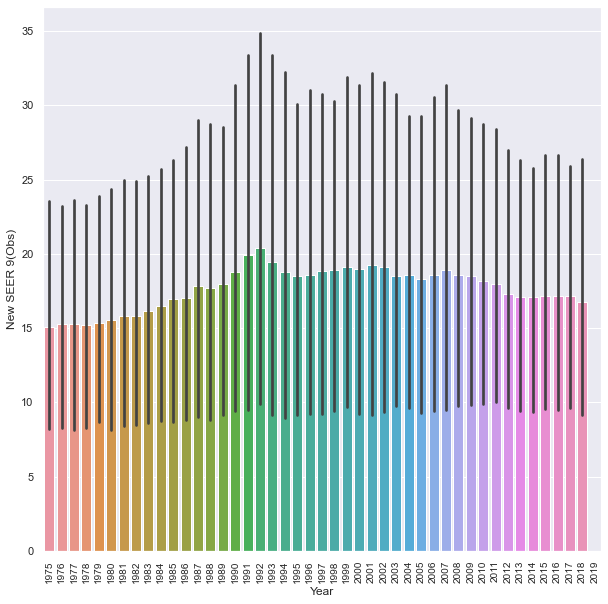

In [2]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(y = df_final['New SEER 9(Obs)'], x = df_final['Year'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

# Relation Overview 

C:\Users\11216\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\11216\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


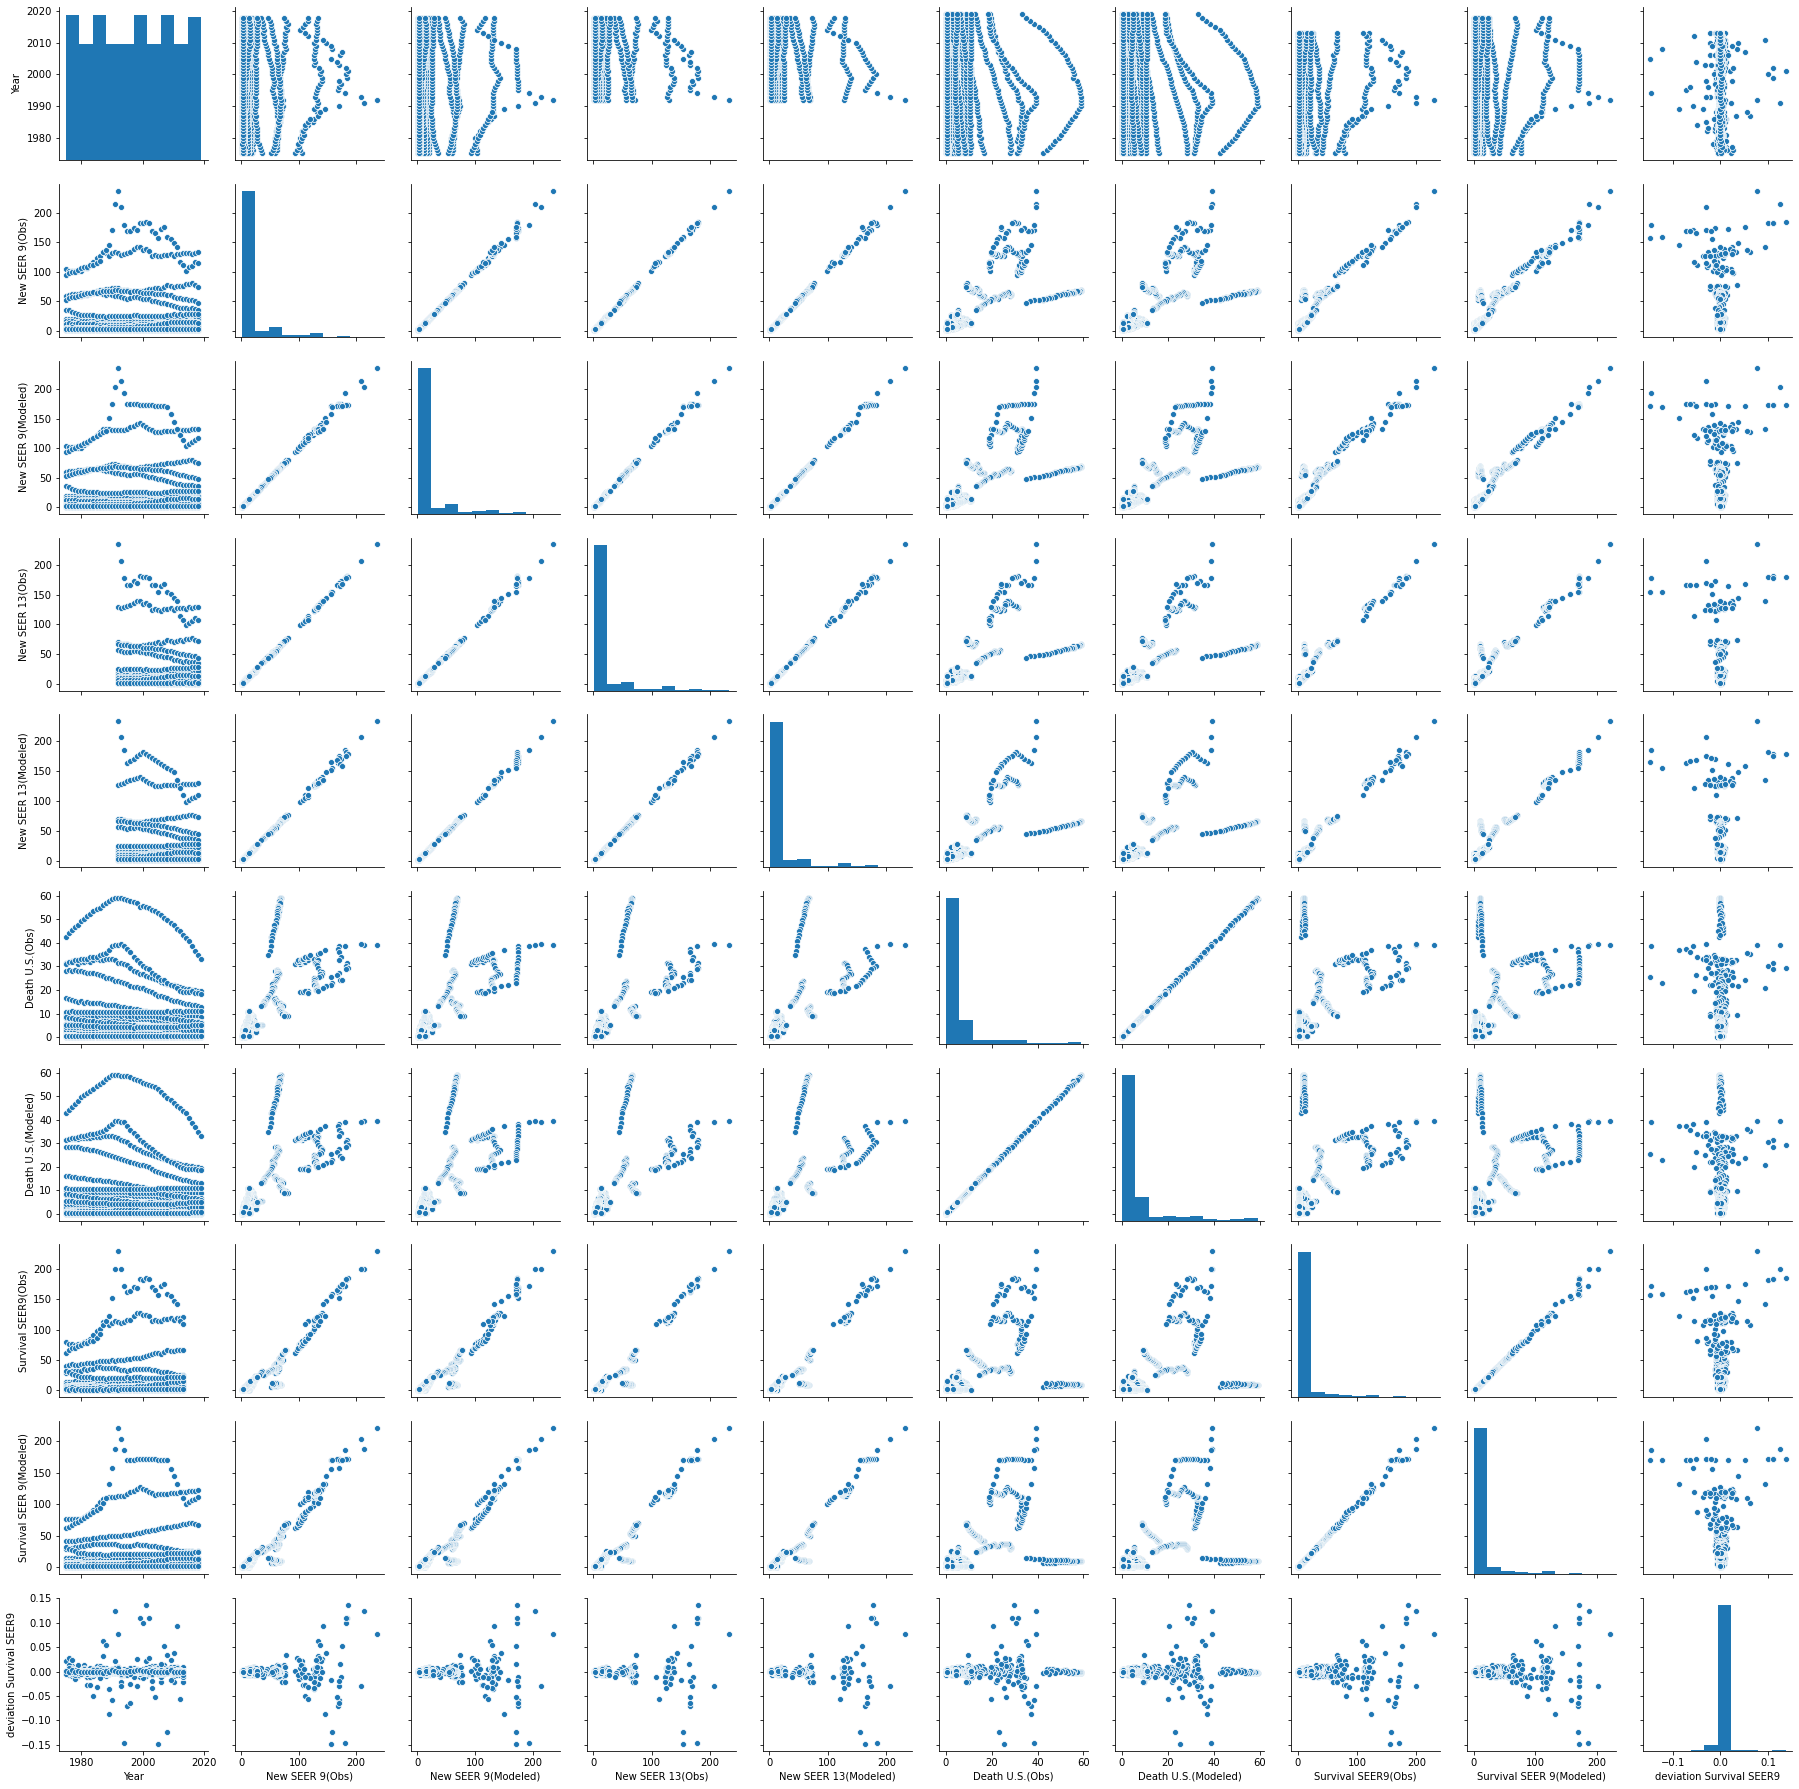

In [14]:
sns.pairplot(df_final)

1. Modeled Trend behave same as observed data.
2. We don't have the data prior 1992 for New cases SEER 13
3. Death rate and new cases for 9 and 13 decline after 1992 shown below

C:\Users\11216\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


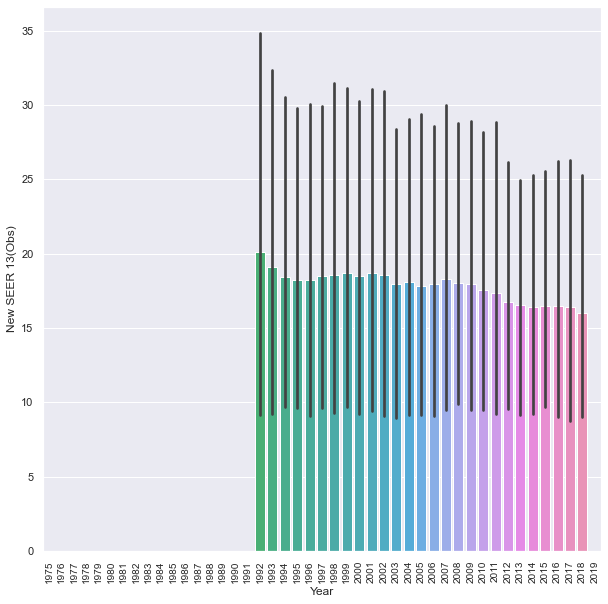

In [29]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(y = df_final['New SEER 13(Obs)'], x = df_final['Year'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

C:\Users\11216\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


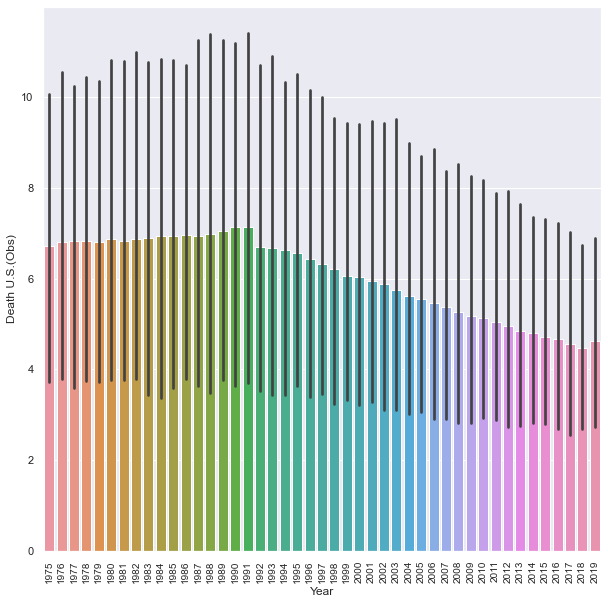

In [30]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(y = df_final['Death U.S.(Obs)'], x = df_final['Year'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

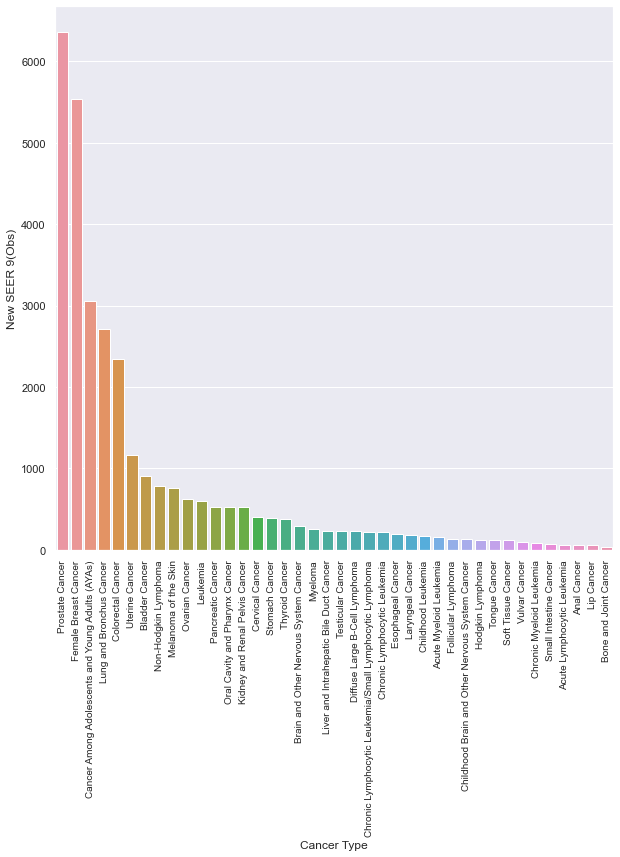

In [44]:
#Top cancer type SEER
def top_cancer_plot(typz):
    sns.set(rc={'figure.figsize':(10,10)})
    cancer_df=df_final.groupby('Cancer Type').sum().reset_index()
    cancer_df.drop('Year',inplace=True,axis=1)
    cancer_df=cancer_df.sort_values(by=typz,ascending=False)
    sns.barplot(y = cancer_df[typz], x = cancer_df['Cancer Type'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
    cancer_df.head(5)[['Cancer Type',typz]]
top_cancer_plot('New SEER 9(Obs)')

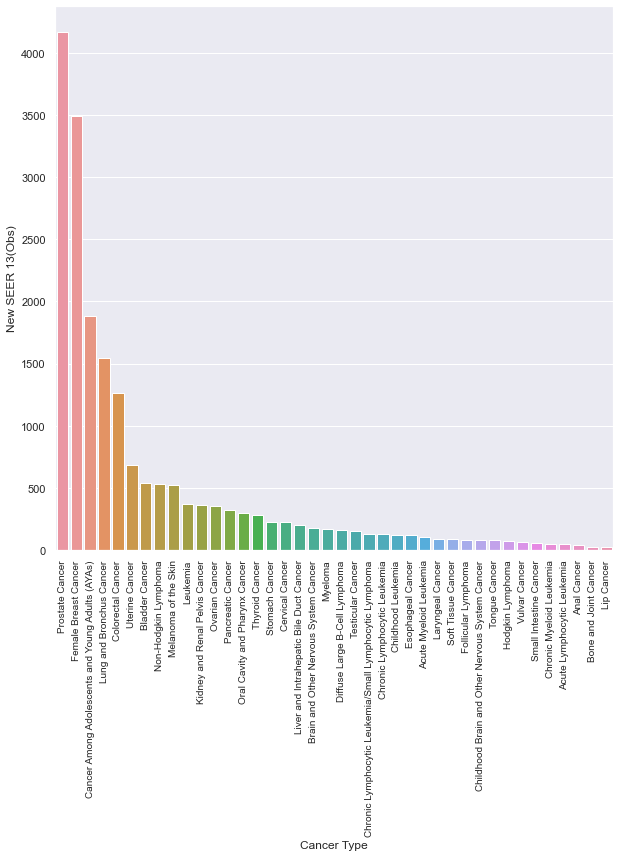

In [45]:
top_cancer_plot('New SEER 13(Obs)')

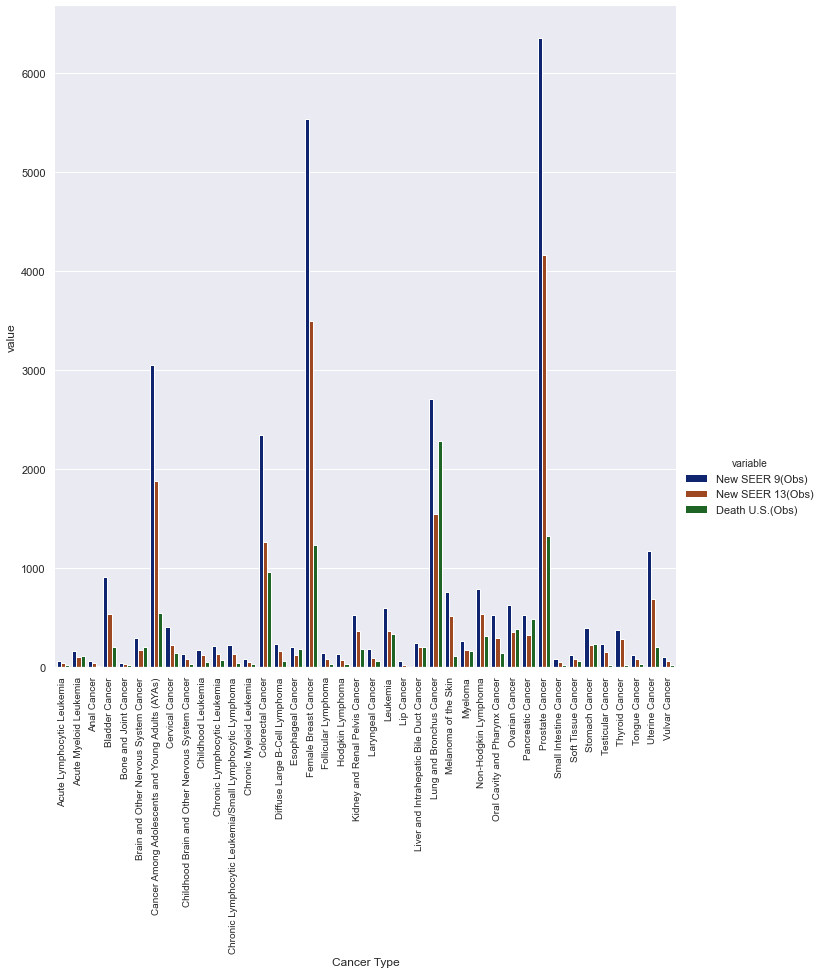

In [32]:
#SEER 13 vs 9 vs death rate    'New SEER 9(Obs)','New SEER 13(Obs)','Death U.S.(Obs)'
def cmp_plot(cmp1,cmp2,cmp3):
    sns.set(rc={'figure.figsize':(50,100)})
    cancer_df=df_final.groupby('Cancer Type').sum().reset_index()
    x=pd.melt(cancer_df,id_vars=['Cancer Type'],value_vars=[cmp1,cmp2,cmp3])
    g=sns.catplot(data=x,kind="bar",x="Cancer Type",y="value",hue="variable",ci="sd",palette="dark",alpha=1,height=10)
    g.despine(left=True)
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
cmp_plot('New SEER 9(Obs)','New SEER 13(Obs)','Death U.S.(Obs)')

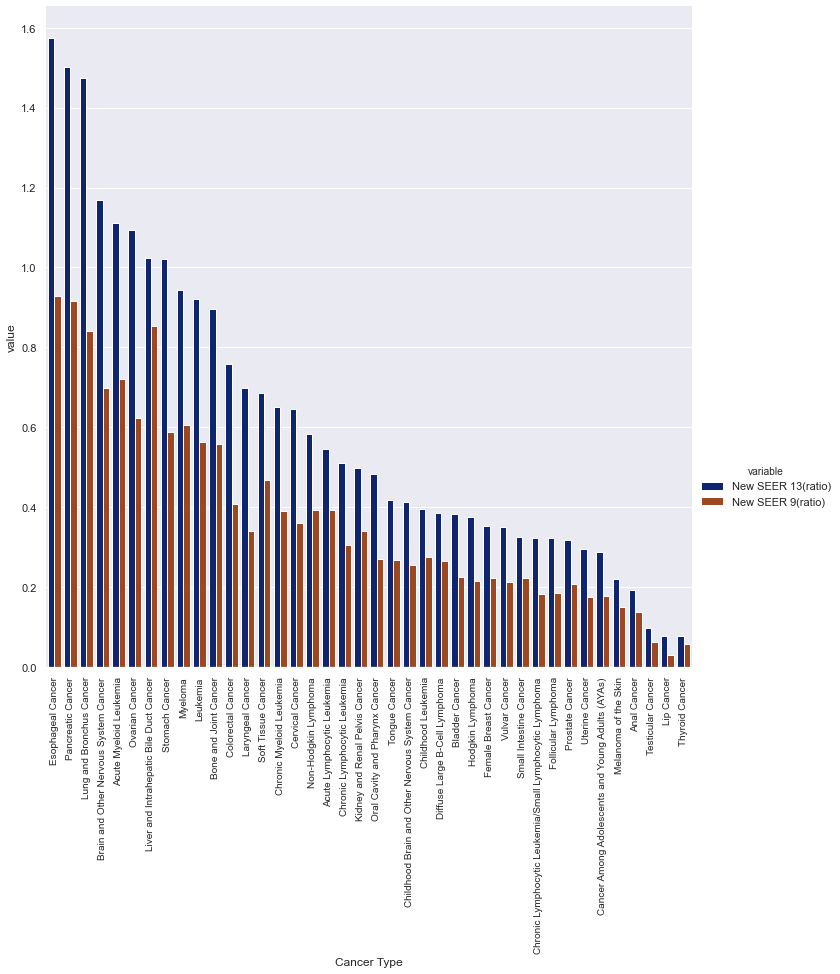

In [43]:
def top_cancer_plot():
    sns.set(rc={'figure.figsize':(10,10)})
    cancer_df=df_final.groupby('Cancer Type').sum().reset_index()
    cancer_df=cancer_df[['New SEER 9(Obs)','New SEER 13(Obs)','Death U.S.(Obs)','Cancer Type']]
    cancer_df['New SEER 9(ratio)']=cancer_df['Death U.S.(Obs)']/cancer_df['New SEER 9(Obs)']
    cancer_df['New SEER 13(ratio)']=cancer_df['Death U.S.(Obs)']/cancer_df['New SEER 13(Obs)']
    x=pd.melt(cancer_df,id_vars=['Cancer Type'],value_vars=['New SEER 9(ratio)','New SEER 13(ratio)'])
    x=x.sort_values(by='value',ascending=False)
    g=sns.catplot(data=x,kind="bar",x="Cancer Type",y="value",hue="variable",ci="sd",palette="dark",alpha=1,height=10)
    g.despine(left=True)
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
top_cancer_plot()


#cancer_df

1. SEER 9 has more cases wrt SEER 13
2. Death rate (death/cases) is not high in top cancer - improvement in treatment and awareness
3. Esophaheal, Pancreatic and Lung Cancer has high death rate.
4. Lung Cancer is more concerning because death/cases as well as number of cases is very high

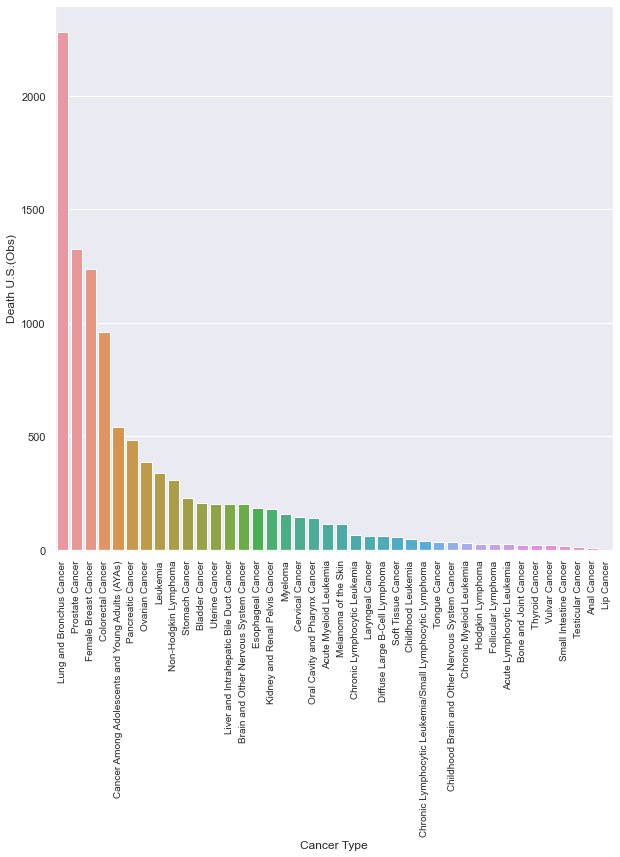

In [20]:
#Top Deadly cancer wrt no of deaths
def deadly_cancer_plot():
    sns.set(rc={'figure.figsize':(10,10)})
    cancer_df=df_final.groupby('Cancer Type').sum().reset_index()
    cancer_df.drop('Year',inplace=True,axis=1)
    cancer_df=cancer_df.sort_values(by='Death U.S.(Obs)',ascending=False)
    sns.barplot(y = cancer_df['Death U.S.(Obs)'], x = cancer_df['Cancer Type'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
deadly_cancer_plot()

Prostate Cancer                                     44
Female Breast Cancer                                44
Lung and Bronchus Cancer                            36
Cancer Among Adolescents and Young Adults (AYAs)     5
Colorectal Cancer                                    3
Name: type, dtype: int64
Top 3 cancer All Time


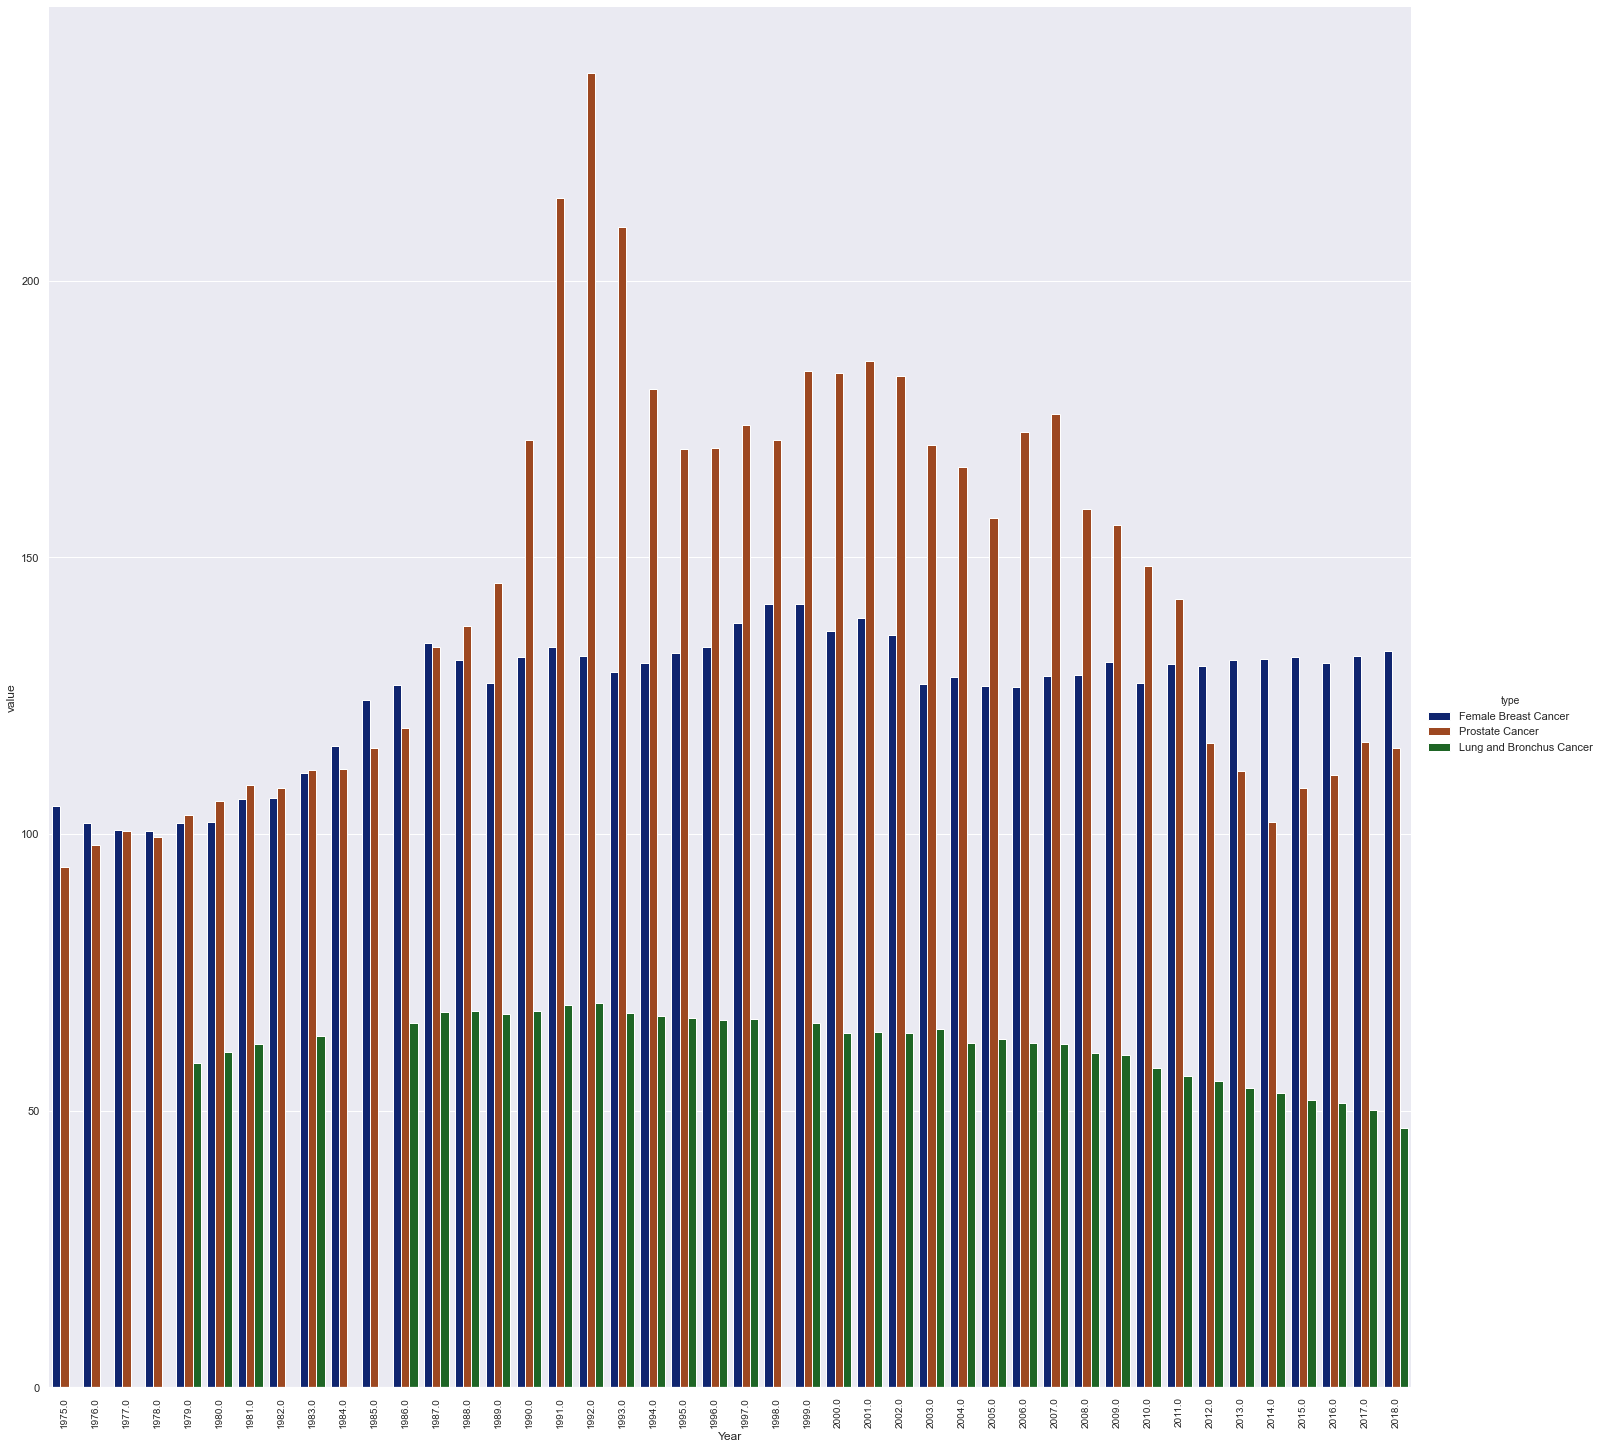

In [21]:
# Year wise top 3 cancers SEER 9
def top_yr_cancer(typz):
    top_list=[]
    cancer_df=df_final[['Year',typz,'Cancer Type']]
    cancer_df=cancer_df.sort_values(by=['Year',typz],ascending=False)
    cancer_df=cancer_df[~(cancer_df[typz].isnull())]
    for yr in list(cancer_df['Year'].unique()):
        top_list.append(list(cancer_df[cancer_df['Year']==yr].iloc[0]))
        top_list.append(list(cancer_df[cancer_df['Year']==yr].iloc[1]))
        top_list.append(list(cancer_df[cancer_df['Year']==yr].iloc[3]))
    x=pd.DataFrame(top_list,columns=['Year','value','type'])
    print(x['type'].value_counts())
    print("Top 3 cancer All Time")
    x=x[x['type'].isin(list(x['type'].value_counts()[x['type'].value_counts()>10].index))]
    g=sns.catplot(data=x,kind="bar",x='Year',y='value',hue='type',ci="sd",palette="dark",alpha=1,height=20)
    g.despine(left=True)
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
top_yr_cancer('New SEER 9(Obs)')

Sudden increase in Prostate Cancer b/w 1990 and 1995

Prostate Cancer                                     27
Female Breast Cancer                                27
Lung and Bronchus Cancer                            25
Cancer Among Adolescents and Young Adults (AYAs)     2
Name: type, dtype: int64
Top 3 cancer All Time


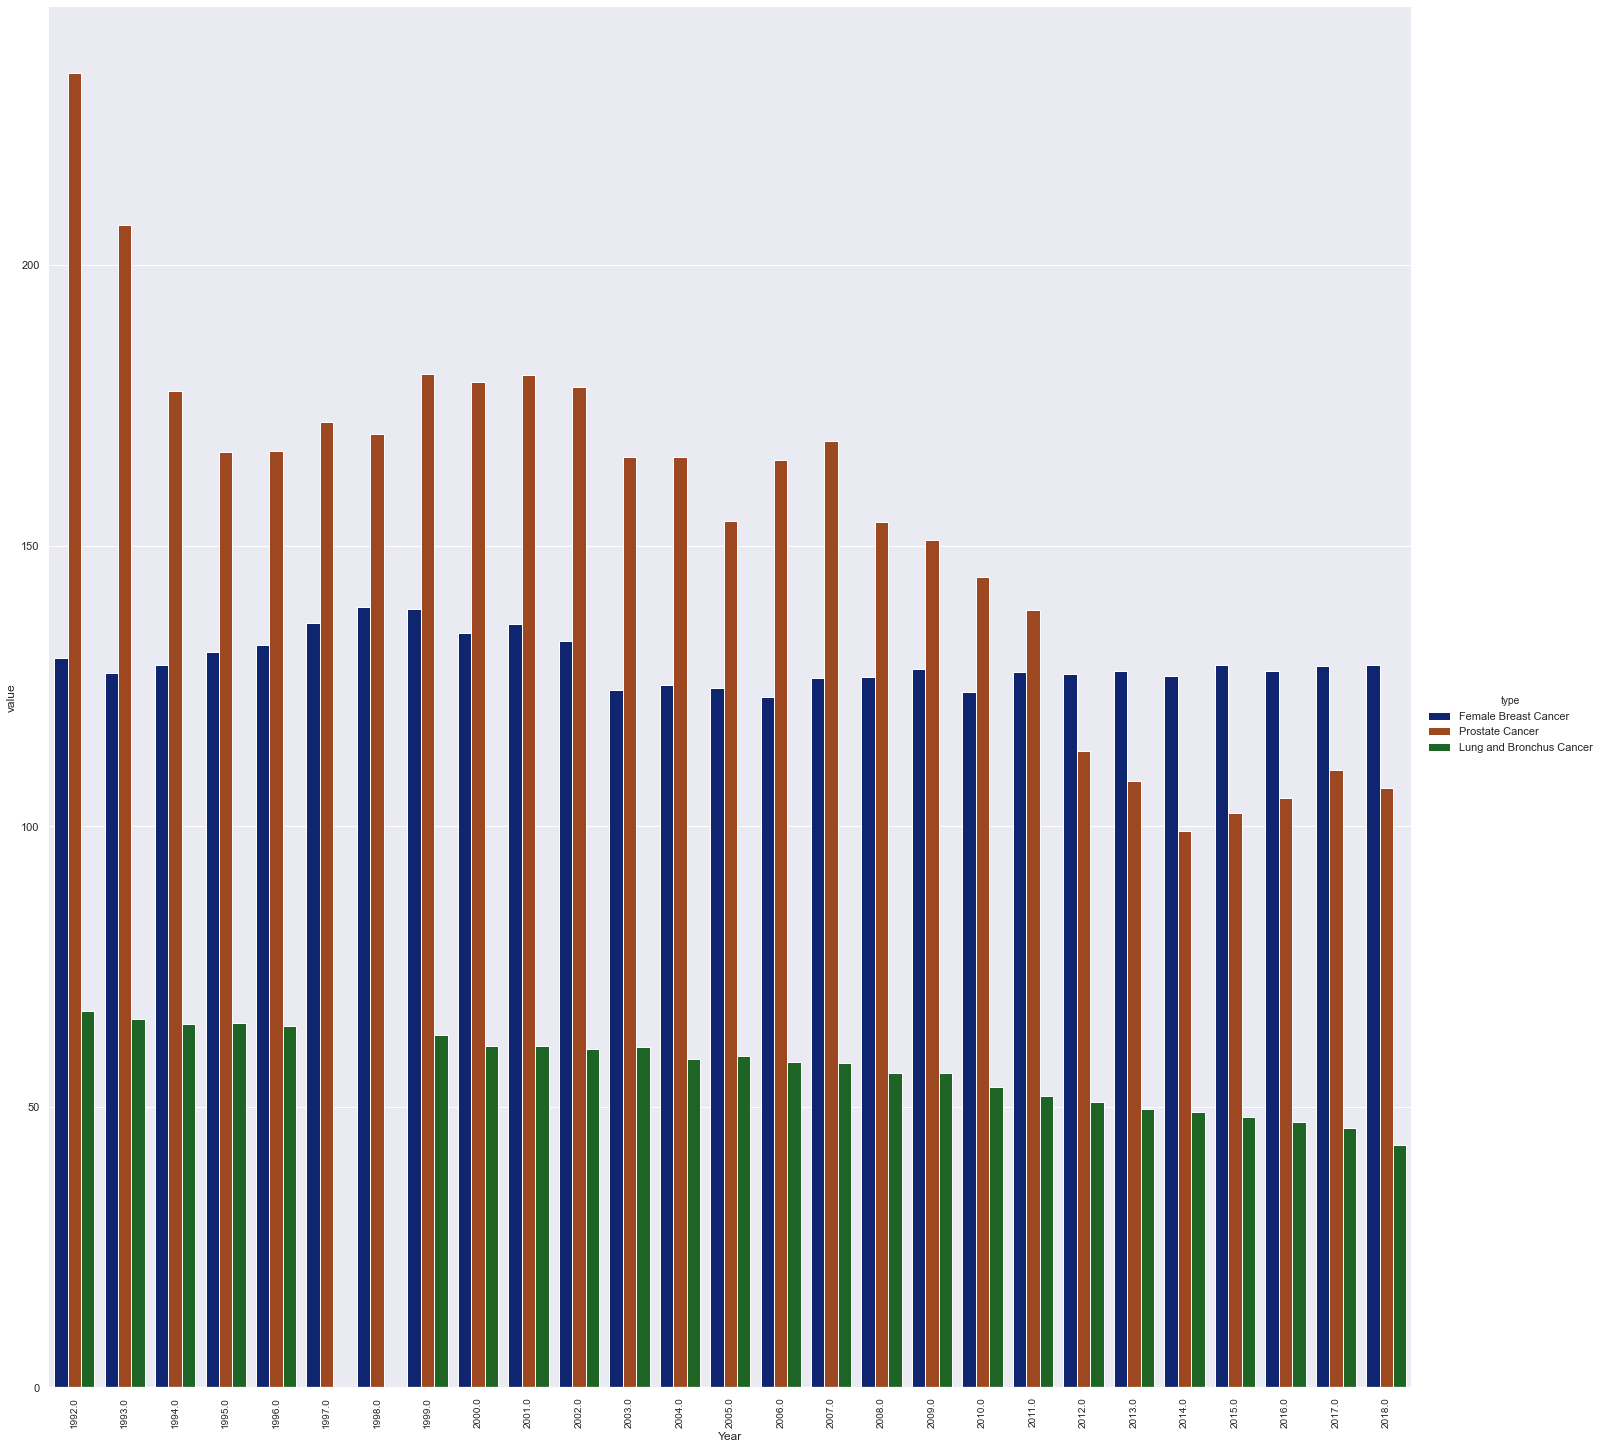

In [22]:
top_yr_cancer('New SEER 13(Obs)')

1. Decline in Prostate Cancer among SEER13 after 1992
2. Hardly any change is observed in Female breast Cancer
3. A slight decline in Lung Cancer every year
4. 1997 and 1998 cancer AYA was 3rd topmost cancer

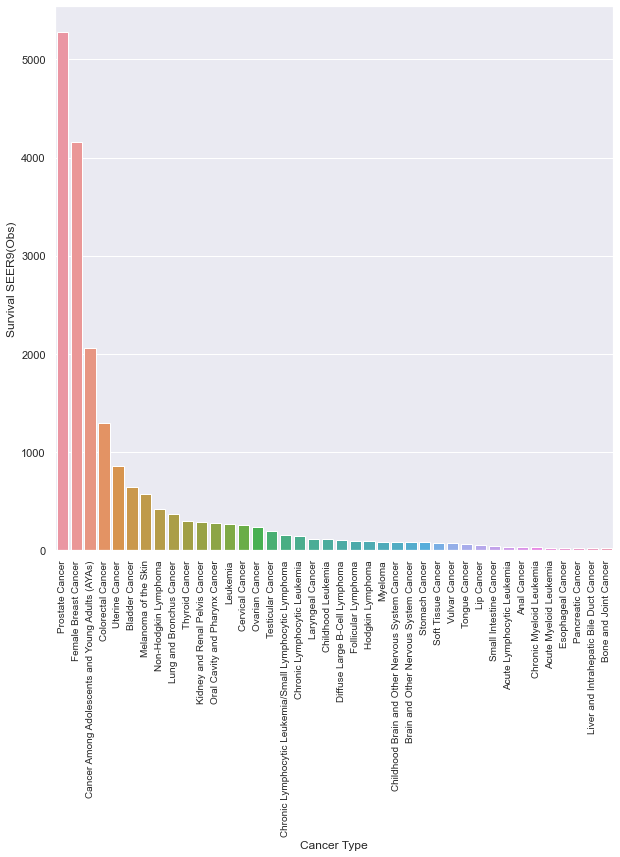

In [24]:
# Year wise top cancers SEER 9 survival rate
sns.set(rc={'figure.figsize':(10,10)})
cancer_df=df_final.groupby('Cancer Type').sum().reset_index()
cancer_df.drop('Year',inplace=True,axis=1)
cancer_df=cancer_df.sort_values(by='Survival SEER9(Obs)',ascending=False)
sns.barplot(y = cancer_df['Survival SEER9(Obs)'], x = cancer_df['Cancer Type'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

C:\Users\11216\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


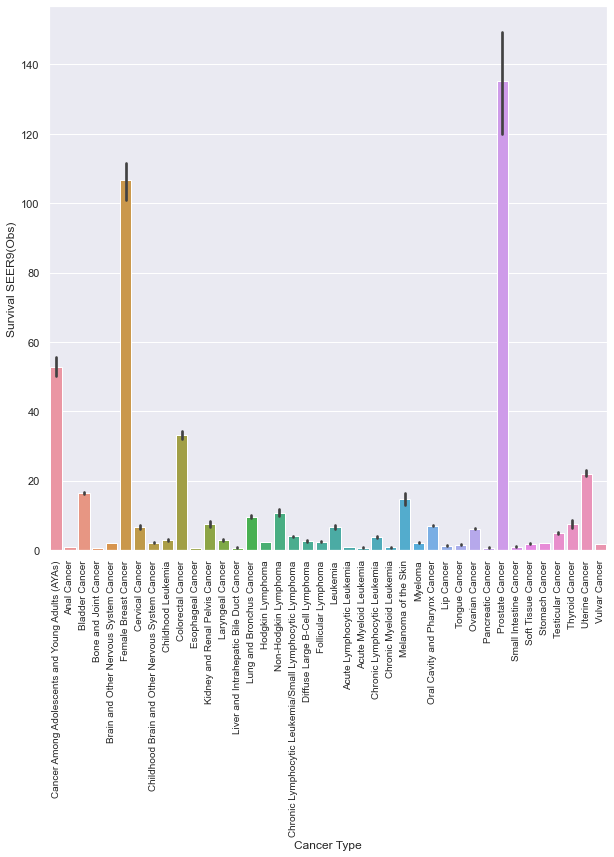

In [46]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(y = df_final['Survival SEER9(Obs)'], x = df_final['Cancer Type'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

# Conclusion

1. Decrease in Death rate show improvement in technology and slight decrease in new cases show increased awareness.
2. Prostate and female breast cancer has highest survival rate.
3. Lung Cancer is more concerning because death/cases as well as number of cases is very high.
